In [74]:
import torchvision.datasets as datasets 
import torchvision
from torch.utils.data import DataLoader
import numpy as np
import os 
import matplotlib.pyplot as plt

In [75]:
current_dir = os.path.dirname(os.path.abspath(''))
data_dir = os.path.join(current_dir, 'final', 'data')
print(data_dir)
if not os.path.exists(data_dir): 
    os.makedirs(data_dir)

/home/hgiang/2022_coding/neural-network-1/final/data


In [76]:
import torch 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


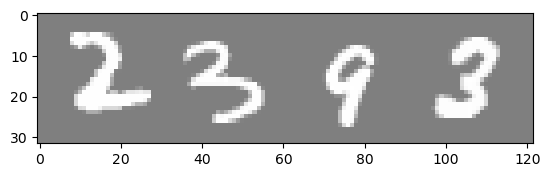

    2     3     9     3


In [101]:
import torchvision.transforms as transforms

batch_size=4

transform = transforms.ToTensor()

# Get MNIST data, normalize, divide by level 
mnist_train = datasets.MNIST(root=data_dir, train=True, download=True, transform=transform)
testset = datasets.MNIST(root=data_dir, train=False, download=True, transform=transform)

trainloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, pin_memory=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, pin_memory=True)

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{labels[j]:5}' for j in range(batch_size)))

In [112]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10)

    def forward(self, x):
        x = self.linear(x)
        return x

net = Net()
net.to(device)

Net(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [113]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

size = len(trainloader.dataset)
num_batches = len(trainloader)

running_losses = []
eval_every = 2000

for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0

    for batch, data in enumerate(trainloader):
        inputs, labels = data
        inputs = inputs.to(device=device)
        labels = labels.to(device=device)
        inputs = inputs.view(-1, 784)

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        pred = net(inputs)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if batch % eval_every == (eval_every-1):    # print every 20 mini-batches
            running_loss = running_loss / eval_every
            # print(f'[{epoch + 1}, {batch + 1:5d}] loss: {running_loss:.3f}')
            running_losses.append(running_loss)
            running_loss = 0.0

print('Finished Training')

Finished Training


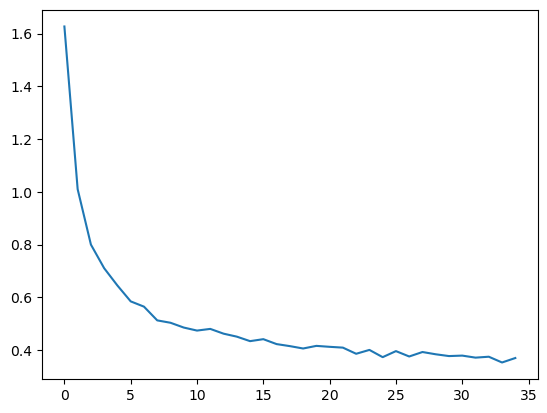

In [114]:
plt.plot(running_losses)

In [115]:
current_dir = os.path.dirname(os.path.abspath(''))
model_path = os.path.join(current_dir, 'final', 'mnist_net.pth')
torch.save(net.state_dict(), model_path)

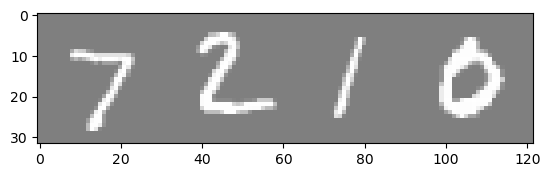

GroundTruth:      7     2     1     0


In [116]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{labels[j]:5}' for j in range(4)))

In [117]:
net = Net()
net.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [118]:
outputs = net(images.view(-1, 784))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{predicted[j]:5}' for j in range(4)))

Predicted:      7     2     1     0


In [120]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images.view(-1, 784))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 90 %
